In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Video_Games_Sales_as_at_22_Dec_2016.csv')
dfa = df
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


# Data preprocessing

In [ ]:
dfb = dfa[['Name','Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
dfb = dfb.fillna(dfb.mean())
dfb = dfb.dropna().reset_index(drop=True)
df2 = dfb[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
df2['Hit'] = df2['Global_Sales']
df2.drop('Global_Sales', axis=1, inplace=True)

In [ ]:
def hit(sales):
    if sales >= 0.17:
        return 1
    else:
        return 0

df2['Hit'] = df2['Hit'].apply(lambda x: hit(x))

In [ ]:
df2.describe()

,Year_of_Release,Critic_Score,Hit
count,16663.000000,16663.000000,16663.000000
mean,2006.489850,68.970311,0.506271
std,5.837393,9.734765,0.499976
min,1980.000000,13.000000,0.000000
25%,2003.000000,68.967679,0.000000
50%,2007.000000,68.967679,1.000000
75%,2010.000000,70.000000,1.000000
max,2020.000000,98.000000,1.000000


In [ ]:
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

In [ ]:
X = X.apply(LabelEncoder().fit_transform)
X

,Platform,Genre,Publisher,Year_of_Release,Critic_Score
0,26,10,361,26,60
1,11,4,361,5,52
2,26,6,361,29,66
3,26,10,361,30,64
4,5,7,361,16,52
...,...,...,...,...,...
16658,17,0,503,37,52
16659,28,10,91,26,52
16660,20,1,233,37,52
16661,6,4,549,23,52


In [ ]:
y.value_counts()

1    8436
0    8227
Name: Hit, dtype: int64

# Splitting into train test validation sets

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=2)
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.1, random_state=2)
ns_probs = [0 for _ in range(len(ytest))]

# Random forest 


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%%time
rfc = RandomForestClassifier()
rfc = rfc.fit(Xtrain,ytrain)

CPU times: user 1.3 s, sys: 27.7 ms, total: 1.33 s
Wall time: 1.33 s


In [ ]:
rfc_pred = rfc.predict(Xtest)
rfc_acc = 100*accuracy_score(ytest,rfc_pred)
rfc_acc

71.44571085782843

In [ ]:
confusion_matrix(ytest,rfc_pred)

array([[604, 240],
       [236, 587]])

In [ ]:
from sklearn.metrics import average_precision_score
rfc_pre = 100*average_precision_score(ytest,rfc_pred)
rfc_pre

64.78284717449895

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


false_positive_rate: [0.         0.28436019 1.        ]
true_positive_rate: [0.         0.71324423 1.        ]


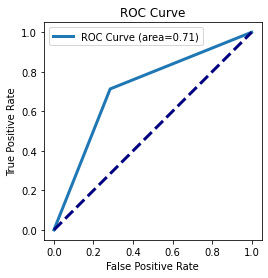

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plot
from sklearn.metrics import auc
false_positive_rate, true_positive_rate, _ = roc_curve(ytest, rfc_pred)
print(f'false_positive_rate: {false_positive_rate}\ntrue_positive_rate: {true_positive_rate}')

area_under_the_curve = auc(false_positive_rate, true_positive_rate)
# index = numpy.where(numpy.round(false_positive_rate, 2)==0.16)[0][0]
figure = plot.figure()
axe = figure.gca()
axe.plot(false_positive_rate, true_positive_rate, lw=3, label="ROC Curve (area={0:.2f})".format(area_under_the_curve))
# axe.axhline(true_positive_rate[index], color='r')
axe.set_xlabel("False Positive Rate")
axe.set_ylabel("True Positive Rate")
axe.set_title("ROC Curve")
axe.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
axe.legend()
axe.set_aspect('equal')
axe.figure.savefig('ROC_EMLP_SelectedDataset.eps',bbox_inches='tight',transparent='true') 
axe.figure.savefig('ROC_EMLP_SelectedDataset.png',bbox_inches='tight',transparent='true')

Precision: [0.49370126 0.70673077 1.        ]
Recall: [1.        0.7144593 0.       ]


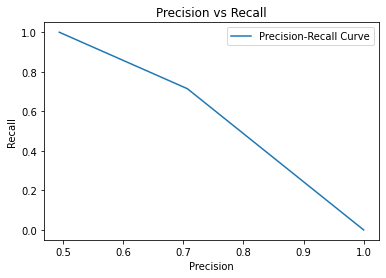

In [ ]:
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(ytest, rfc_pred)
print(f'Precision: {precision}\nRecall: {recall}')



figure = plot.figure()
axe = figure.gca()
axe.plot(precision, recall, label="Precision-Recall Curve")
# axe.plot(closest_zero_precision, closest_zero_recall, "o", markersize=12, mew=3, fillstyle='none')
axe.set_xlabel("Precision")
axe.set_ylabel("Recall")
# axe.axhline(recall_at_precision, color="r")
axe.legend()
title = axe.set_title("Precision vs Recall")

In [ ]:
!pip install yellowbrick

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


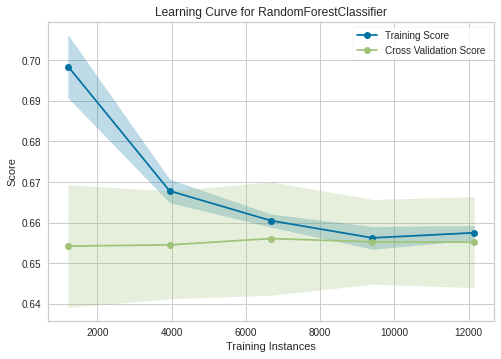

AxesSubplot(0.125,0.125;0.775x0.755)


In [ ]:

from yellowbrick.model_selection import learning_curve


rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
print(learning_curve(rfc, Xtrain, ytrain, cv=10, scoring='accuracy'))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

cm1 = confusion_matrix(ytest, rfc_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

fpr, tpr, thresholds = metrics.roc_curve(ytest, rfc_pred)
print("AUC",metrics.auc(fpr, tpr))


import numpy as np
from sklearn.metrics import roc_auc_score
print("roc_auc",roc_auc_score(ytest, rfc_pred))

Confusion Matrix : 
 [[600 244]
 [235 588]]
Accuracy :  0.7126574685062987
Sensitivity :  0.7109004739336493
Specificity :  0.7144592952612394
AUC 0.7126798845974444
roc_auc 0.7126798845974444


In [ ]:
from sklearn.metrics import  classification_report
print(classification_report(ytest, rfc_pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       844
           1       0.71      0.71      0.71       823

    accuracy                           0.71      1667
   macro avg       0.71      0.71      0.71      1667
weighted avg       0.71      0.71      0.71      1667



In [ ]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 2 (0.291842)
2. feature 4 (0.215033)
3. feature 3 (0.209743)
4. feature 1 (0.149547)
5. feature 0 (0.133836)


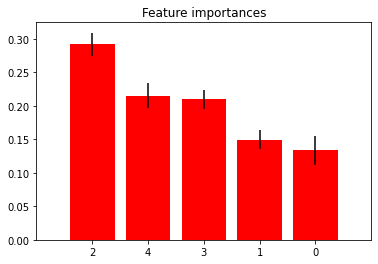

In [ ]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr = lr.fit(Xtrain,ytrain)

In [ ]:
lr_pred = lr.predict(Xtest)
lr_acc = 100*accuracy_score(ytest,lr_pred)
lr_acc

60.94781043791242

In [ ]:
lr_pre = 100*accuracy_score(ytest,lr_pred)
lr_pre

60.94781043791242

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


false_positive_rate: [0.        0.4028436 1.       ]
true_positive_rate: [0.         0.62211422 1.        ]


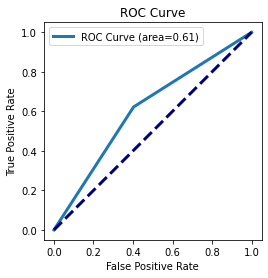

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plot
false_positive_rate, true_positive_rate, _ = roc_curve(ytest, lr_pred)
print(f'false_positive_rate: {false_positive_rate}\ntrue_positive_rate: {true_positive_rate}')

area_under_the_curve = auc(false_positive_rate, true_positive_rate)
# index = numpy.where(numpy.round(false_positive_rate, 2)==0.16)[0][0]
figure = plot.figure()
axe = figure.gca()
axe.plot(false_positive_rate, true_positive_rate, lw=3, label="ROC Curve (area={0:.2f})".format(area_under_the_curve))
# axe.axhline(true_positive_rate[index], color='r')
axe.set_xlabel("False Positive Rate")
axe.set_ylabel("True Positive Rate")
axe.set_title("ROC Curve")
axe.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
axe.legend()
axe.set_aspect('equal')
axe.figure.savefig('ROC_EMLP_SelectedDataset.eps',bbox_inches='tight',transparent='true') 
axe.figure.savefig('ROC_EMLP_SelectedDataset.png',bbox_inches='tight',transparent='true')

Precision: [0.49370126 0.60093897 1.        ]
Recall: [1.         0.62211422 0.        ]


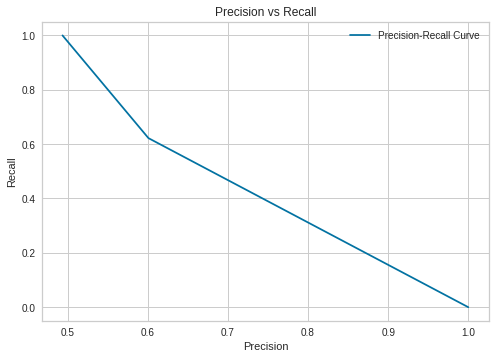

In [ ]:
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(ytest, lr_pred)
print(f'Precision: {precision}\nRecall: {recall}')



figure = plot.figure()
axe = figure.gca()
axe.plot(precision, recall, label="Precision-Recall Curve")
# axe.plot(closest_zero_precision, closest_zero_recall, "o", markersize=12, mew=3, fillstyle='none')
axe.set_xlabel("Precision")
axe.set_ylabel("Recall")
# axe.axhline(recall_at_precision, color="r")
axe.legend()
title = axe.set_title("Precision vs Recall")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


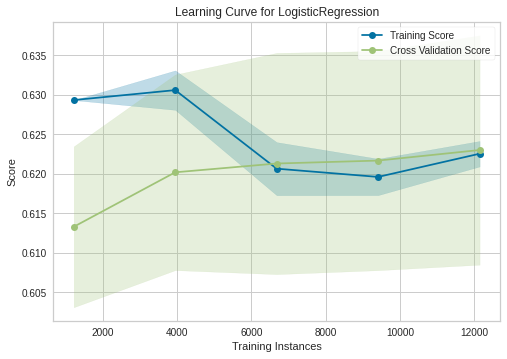

AxesSubplot(0.125,0.125;0.775x0.755)


In [ ]:

from yellowbrick.model_selection import learning_curve

print(learning_curve(LogisticRegression(), Xtrain, ytrain, cv=10, scoring='accuracy'))

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC


In [ ]:
svc = SVC(kernel='linear')
svc.fit(Xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc_pred = svc.predict(Xtest)
svc_pred = (svc_pred>0.5)
svc_acc = 100*accuracy_score(ytest,svc_pred)
svc_pre = 100*average_precision_score(ytest,svc_pred)

In [ ]:
svc_acc

61.187762447510494

In [ ]:
svc_pre

56.30043545187855

false_positive_rate: [0.         0.35189573 1.        ]
true_positive_rate: [0.         0.57472661 1.        ]


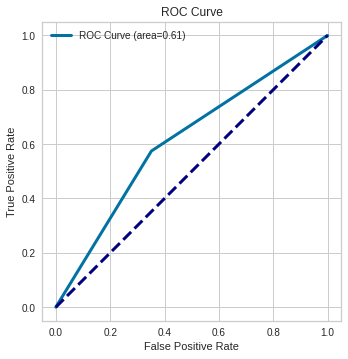

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plot
false_positive_rate, true_positive_rate, _ = roc_curve(ytest, svc_pred)
print(f'false_positive_rate: {false_positive_rate}\ntrue_positive_rate: {true_positive_rate}')

area_under_the_curve = auc(false_positive_rate, true_positive_rate)
# index = numpy.where(numpy.round(false_positive_rate, 2)==0.16)[0][0]
figure = plot.figure()
axe = figure.gca()
axe.plot(false_positive_rate, true_positive_rate, lw=3, label="ROC Curve (area={0:.2f})".format(area_under_the_curve))
# axe.axhline(true_positive_rate[index], color='r')
axe.set_xlabel("False Positive Rate")
axe.set_ylabel("True Positive Rate")
axe.set_title("ROC Curve")
axe.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
axe.legend()
axe.set_aspect('equal')
axe.figure.savefig('ROC_EMLP_SelectedDataset.eps',bbox_inches='tight',transparent='true') 
axe.figure.savefig('ROC_EMLP_SelectedDataset.png',bbox_inches='tight',transparent='true')

Precision: [0.49370126 0.61428571 1.        ]
Recall: [1.         0.57472661 0.        ]


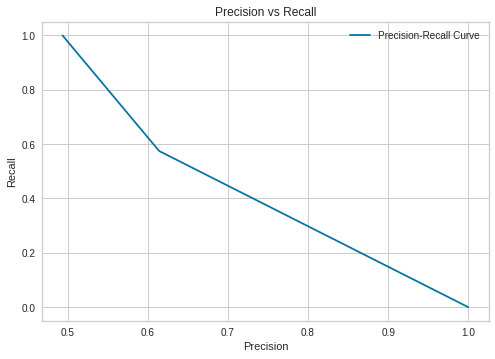

In [ ]:
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(ytest, svc_pred)
print(f'Precision: {precision}\nRecall: {recall}')



figure = plot.figure()
axe = figure.gca()
axe.plot(precision, recall, label="Precision-Recall Curve")
# axe.plot(closest_zero_precision, closest_zero_recall, "o", markersize=12, mew=3, fillstyle='none')
axe.set_xlabel("Precision")
axe.set_ylabel("Recall")
# axe.axhline(recall_at_precision, color="r")
axe.legend()
title = axe.set_title("Precision vs Recall")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


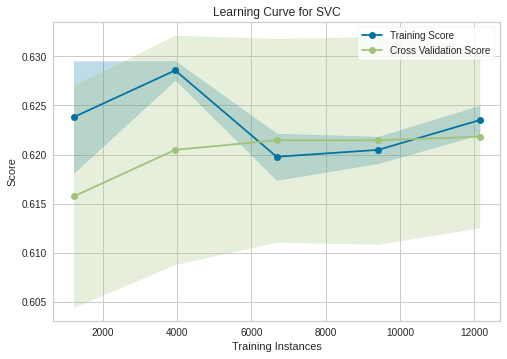

AxesSubplot(0.125,0.125;0.775x0.755)


In [ ]:
print(learning_curve(SVC(kernel='linear'), Xtrain, ytrain, cv=10, scoring='accuracy'))

# K Near Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(Xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
knc_pred = knc.predict(Xtest)
knc_acc = 100*accuracy_score(ytest,knc_pred)
knc_acc

68.50629874025195

In [ ]:
knc_pre = 100*average_precision_score(ytest,knc_pred)
knc_pre

63.487109702188235

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


false_positive_rate: [0.         0.16113744 1.        ]
true_positive_rate: [0.       0.527339 1.      ]


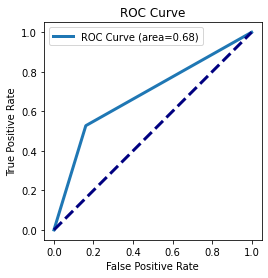

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plot
false_positive_rate, true_positive_rate, _ = roc_curve(ytest, knc_pred)
print(f'false_positive_rate: {false_positive_rate}\ntrue_positive_rate: {true_positive_rate}')

area_under_the_curve = auc(false_positive_rate, true_positive_rate)
# index = numpy.where(numpy.round(false_positive_rate, 2)==0.16)[0][0]
figure = plot.figure()
axe = figure.gca()
axe.plot(false_positive_rate, true_positive_rate, lw=3, label="ROC Curve (area={0:.2f})".format(area_under_the_curve))
# axe.axhline(true_positive_rate[index], color='r')
axe.set_xlabel("False Positive Rate")
axe.set_ylabel("True Positive Rate")
axe.set_title("ROC Curve")
axe.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
axe.legend()
axe.set_aspect('equal')
axe.figure.savefig('ROC_EMLP_SelectedDataset.eps',bbox_inches='tight',transparent='true') 
axe.figure.savefig('ROC_EMLP_SelectedDataset.png',bbox_inches='tight',transparent='true')

Precision: [0.49370126 0.76140351 1.        ]
Recall: [1.       0.527339 0.      ]


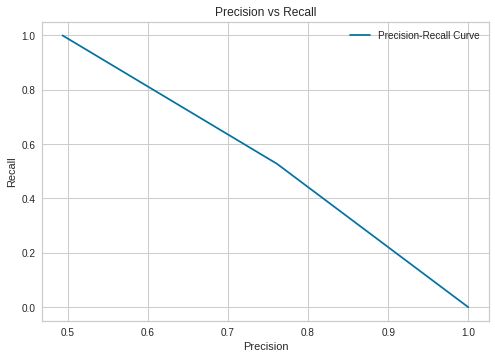

In [ ]:
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(ytest, knc_pred)
print(f'Precision: {precision}\nRecall: {recall}')



figure = plot.figure()
axe = figure.gca()
axe.plot(precision, recall, label="Precision-Recall Curve")
# axe.plot(closest_zero_precision, closest_zero_recall, "o", markersize=12, mew=3, fillstyle='none')
axe.set_xlabel("Precision")
axe.set_ylabel("Recall")
# axe.axhline(recall_at_precision, color="r")
axe.legend()
title = axe.set_title("Precision vs Recall")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


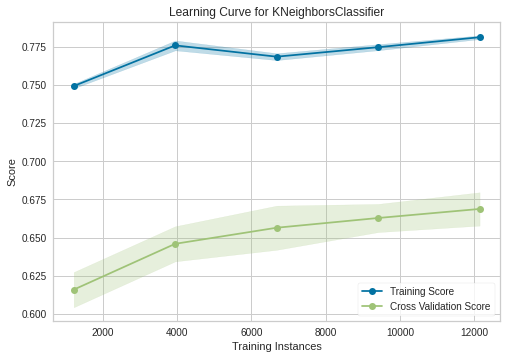

AxesSubplot(0.125,0.125;0.775x0.755)


In [ ]:
print(learning_curve(KNeighborsClassifier(), Xtrain, ytrain, cv=10, scoring='accuracy'))

# ANN

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.fit_transform(Xtest)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
#input
model.add(Dense(12, input_dim=5, activation='relu'))

#hidden
#model.add(Dense(8, activation='relu'))

#output
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(Xtrain, ytrain, epochs=50, batch_size=10, validation_data=(Xval, yval))

Epoch 1/50
1350/1350 [==============================] - 2s 2ms/step - loss: 0.6137 - accuracy: 0.6537 - val_loss: 73.5342 - val_accuracy: 0.4967
Epoch 2/50
1350/1350 [==============================] - 2s 1ms/step - loss: 0.6139 - accuracy: 0.6533 - val_loss: 65.8026 - val_accuracy: 0.4967
Epoch 3/50
1350/1350 [==============================] - 2s 1ms/step - loss: 0.6138 - accuracy: 0.6543 - val_loss: 66.1496 - val_accuracy: 0.4967
Epoch 4/50
1350/1350 [==============================] - 2s 1ms/step - loss: 0.6138 - accuracy: 0.6535 - val_loss: 71.7566 - val_accuracy: 0.4967
Epoch 5/50
1350/1350 [==============================] - 2s 1ms/step - loss: 0.6141 - accuracy: 0.6523 - val_loss: 63.6689 - val_accuracy: 0.4967
Epoch 6/50
1350/1350 [==============================] - 2s 1ms/step - loss: 0.6136 - accuracy: 0.6540 - val_loss: 66.4198 - val_accuracy: 0.4967
Epoch 7/50
1350/1350 [==============================] - 2s 1ms/step - loss: 0.6133 - accuracy: 0.6569 - val_loss: 76.3601 - val_ac

In [ ]:
ann1_pred = model.predict(Xtest)
ann1_pred = (ann1_pred>0.5)
ann_acc = 100*accuracy_score(ytest,ann1_pred)
ann_acc

64.72705458908217

In [ ]:
ann_pre = 100*average_precision_score(ytest,ann1_pred)
ann_pre

59.045389267415295

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


false_positive_rate: [0.         0.32345972 1.        ]
true_positive_rate: [0.         0.61725395 1.        ]


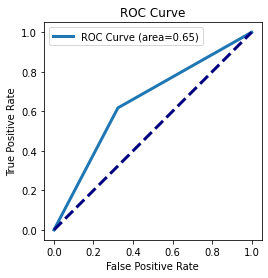

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plot
from sklearn.metrics import auc
false_positive_rate, true_positive_rate, _ = roc_curve(ytest, ann1_pred)
print(f'false_positive_rate: {false_positive_rate}\ntrue_positive_rate: {true_positive_rate}')

area_under_the_curve = auc(false_positive_rate, true_positive_rate)
# index = numpy.where(numpy.round(false_positive_rate, 2)==0.16)[0][0]
figure = plot.figure()
axe = figure.gca()
axe.plot(false_positive_rate, true_positive_rate, lw=3, label="ROC Curve (area={0:.2f})".format(area_under_the_curve))
# axe.axhline(true_positive_rate[index], color='r')
axe.set_xlabel("False Positive Rate")
axe.set_ylabel("True Positive Rate")
axe.set_title("ROC Curve")
axe.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
axe.legend()
axe.set_aspect('equal')
axe.figure.savefig('ROC_EMLP_SelectedDataset.eps',bbox_inches='tight',transparent='true') 
axe.figure.savefig('ROC_EMLP_SelectedDataset.png',bbox_inches='tight',transparent='true')

Precision: [0.49370126 0.65044814 1.        ]
Recall: [1.         0.61725395 0.        ]


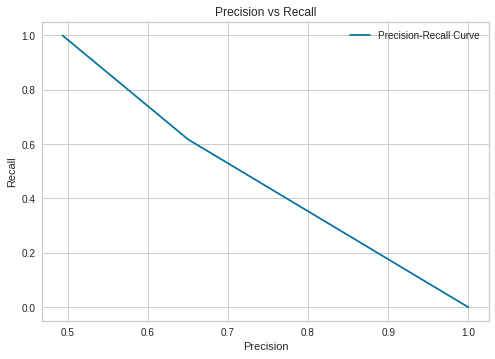

In [ ]:
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(ytest, ann1_pred)
print(f'Precision: {precision}\nRecall: {recall}')



figure = plot.figure()
axe = figure.gca()
axe.plot(precision, recall, label="Precision-Recall Curve")
# axe.plot(closest_zero_precision, closest_zero_recall, "o", markersize=12, mew=3, fillstyle='none')
axe.set_xlabel("Precision")
axe.set_ylabel("Recall")
# axe.axhline(recall_at_precision, color="r")
axe.legend()
title = axe.set_title("Precision vs Recall")

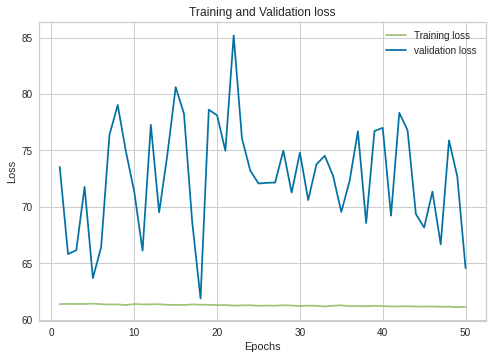

In [ ]:
import matplotlib.pyplot as plt

loss_train = [i * 100 for i in history.history['loss']]
loss_val = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

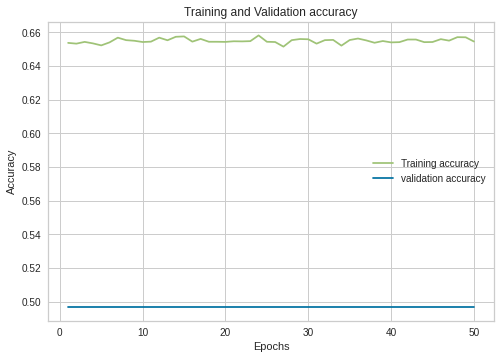

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

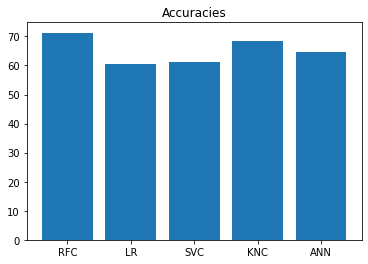

In [ ]:
accuray=[rfc_acc,lr_acc,svc_acc,knc_acc,ann_acc]
xaxis=[1,2,3,4,5]
label = ['RFC','LR','SVC','KNC','ANN']
plt.title('Accuracies')
plt.bar(xaxis,accuray,width=0.8,tick_label=label)

plt.show()

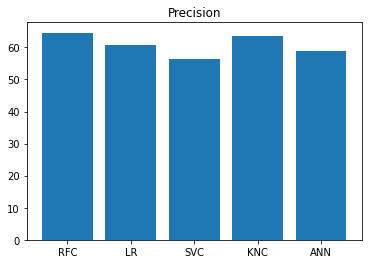

In [ ]:
precision=[rfc_pre,lr_pre,svc_pre,knc_pre,ann_pre]
xaxis=[1,2,3,4,5]
label = ['RFC','LR','SVC','KNC','ANN']
plt.title('Precision')
plt.bar(xaxis,precision,width=0.8,tick_label=label)

plt.show()